<a href="https://colab.research.google.com/github/bigirimanainnocent12/Visualisations-de-donn-es/blob/main/Techniques_de_visulaisations_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Visualisations de données***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importation de la base de données**

In [5]:
df=pd.read_csv('study_performance.csv',sep=";")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Statistiques de performance en fonction du genre et de la participation au cours de préparation au test**

In [6]:
df.groupby(["gender","test_preparation_course"])['reading_score'].describe()

count       mean        std   min   25%   50%  \
gender test_preparation_course                                                  
female completed                184.0  77.375000  12.695493  40.0  70.0  78.0   
       none                     334.0  69.982036  14.591730  17.0  61.0  71.0   
male   completed                174.0  70.212644  13.668480  37.0  61.0  71.0   
       none                     308.0  62.795455  13.375328  23.0  54.0  63.0   

                                 75%    max  
gender test_preparation_course               
female completed                86.0  100.0  
       none                     80.0  100.0  
male   completed                81.0  100.0  
       none                     73.0   96.0

# **Répartition totale par le genre des étudiants selon l'origine ethnique.**


In [7]:
pd.crosstab(df["gender"],df["race_ethnicity"],margins=True)

race_ethnicity,group A,group B,group C,group D,group E,All
gender,,,,,,
female,36,104,180,129,69,518
male,53,86,139,133,71,482
All,89,190,319,262,140,1000



# **Statistiques de performance en fonction du genre et de l'origine ethnique des étudiants**

In [8]:
df.groupby(["gender","race_ethnicity"])['math_score'].describe()

count       mean        std   min    25%   50%    75%  \
gender race_ethnicity                                                          
female group A          36.0  58.527778  14.157252  34.0  48.75  57.0  68.25   
       group B         104.0  61.403846  16.256750   8.0  52.00  62.0  73.00   
       group C         180.0  62.033333  15.007224   0.0  53.00  63.0  71.00   
       group D         129.0  65.248062  14.174157  26.0  56.00  65.0  75.00   
       group E          69.0  70.811594  16.269129  32.0  61.00  71.0  81.00   
male   group A          53.0  63.735849  14.520742  28.0  53.00  63.0  72.00   
       group B          86.0  65.930233  14.156928  30.0  57.25  65.0  75.75   
       group C         139.0  67.611511  14.090037  27.0  58.00  68.0  78.00   
       group D         133.0  69.413534  13.094139  39.0  61.00  71.0  80.00   
       group E          71.0  76.746479  14.298570  30.0  68.50  78.0  87.00   

                         max  
gender race_ethnicity         
female group A          92.0  
       group B          97.0  
       group C          96.0  
       group D          98.0  
       group E         100.0  
male   group A         100.0  
       group B          94.0  
       group C          98.0  
       group D         100.0  
       group E         100.0

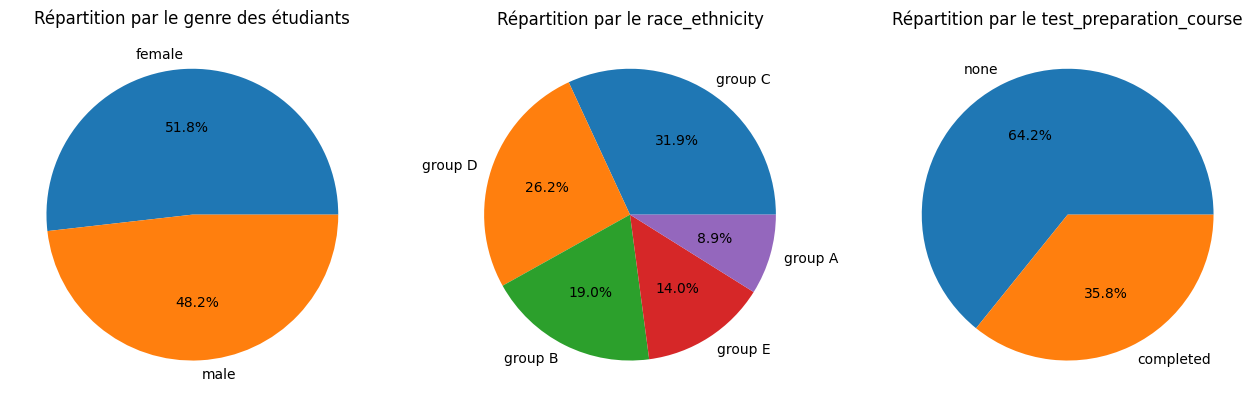

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].pie(df["gender"].value_counts(),labels=df["gender"].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Répartition par le genre des étudiants')

axes[1].pie(df["race_ethnicity"].value_counts(),labels=df["race_ethnicity"].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Répartition par le race_ethnicity')

axes[2].pie(df["test_preparation_course"].value_counts(),labels=df["test_preparation_course"].value_counts().index,autopct='%1.1f%%')
axes[2].set_title('Répartition par le test_preparation_course')

plt.show()

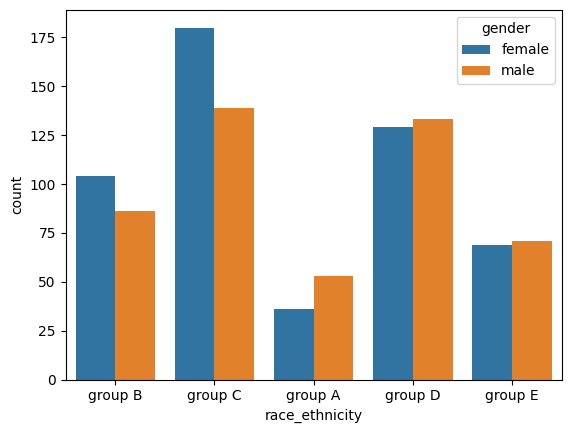

In [66]:

sns.countplot(x='race_ethnicity',data=df,hue="gender")

plt.show()

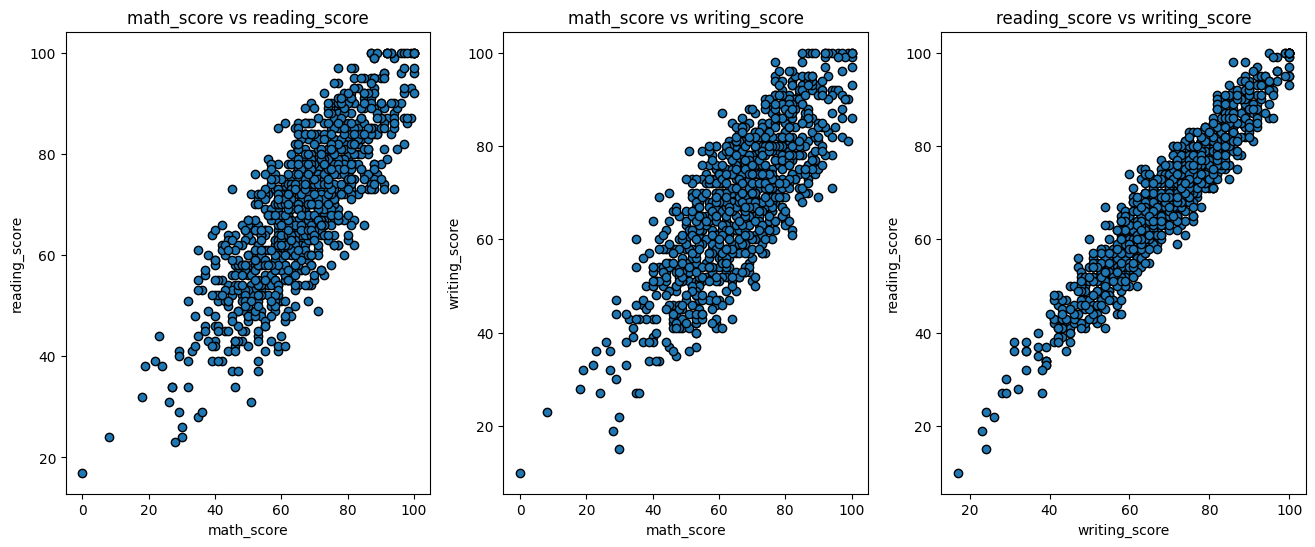

In [12]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].scatter("math_score","reading_score",data=df,alpha=1,edgecolor='k')
axes[0].set_title("math_score vs reading_score")
axes[0].set_ylabel("reading_score")
axes[0].set_xlabel("math_score")

axes[1].scatter("math_score","writing_score",data=df,alpha=1,edgecolor='k')
axes[1].set_title("math_score vs writing_score")
axes[1].set_ylabel("writing_score")
axes[1].set_xlabel("math_score")


axes[2].scatter("reading_score","writing_score",data=df,alpha=1,edgecolor='k')
axes[2].set_title("reading_score vs writing_score")
axes[2].set_ylabel("reading_score")
axes[2].set_xlabel("writing_score")

plt.show()

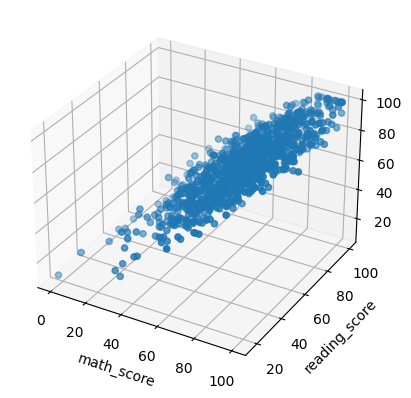

In [17]:

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter(df["math_score"],df["reading_score"],df["writing_score"])
ax.set_xlabel("math_score")
ax.set_ylabel("reading_score")
plt.show()

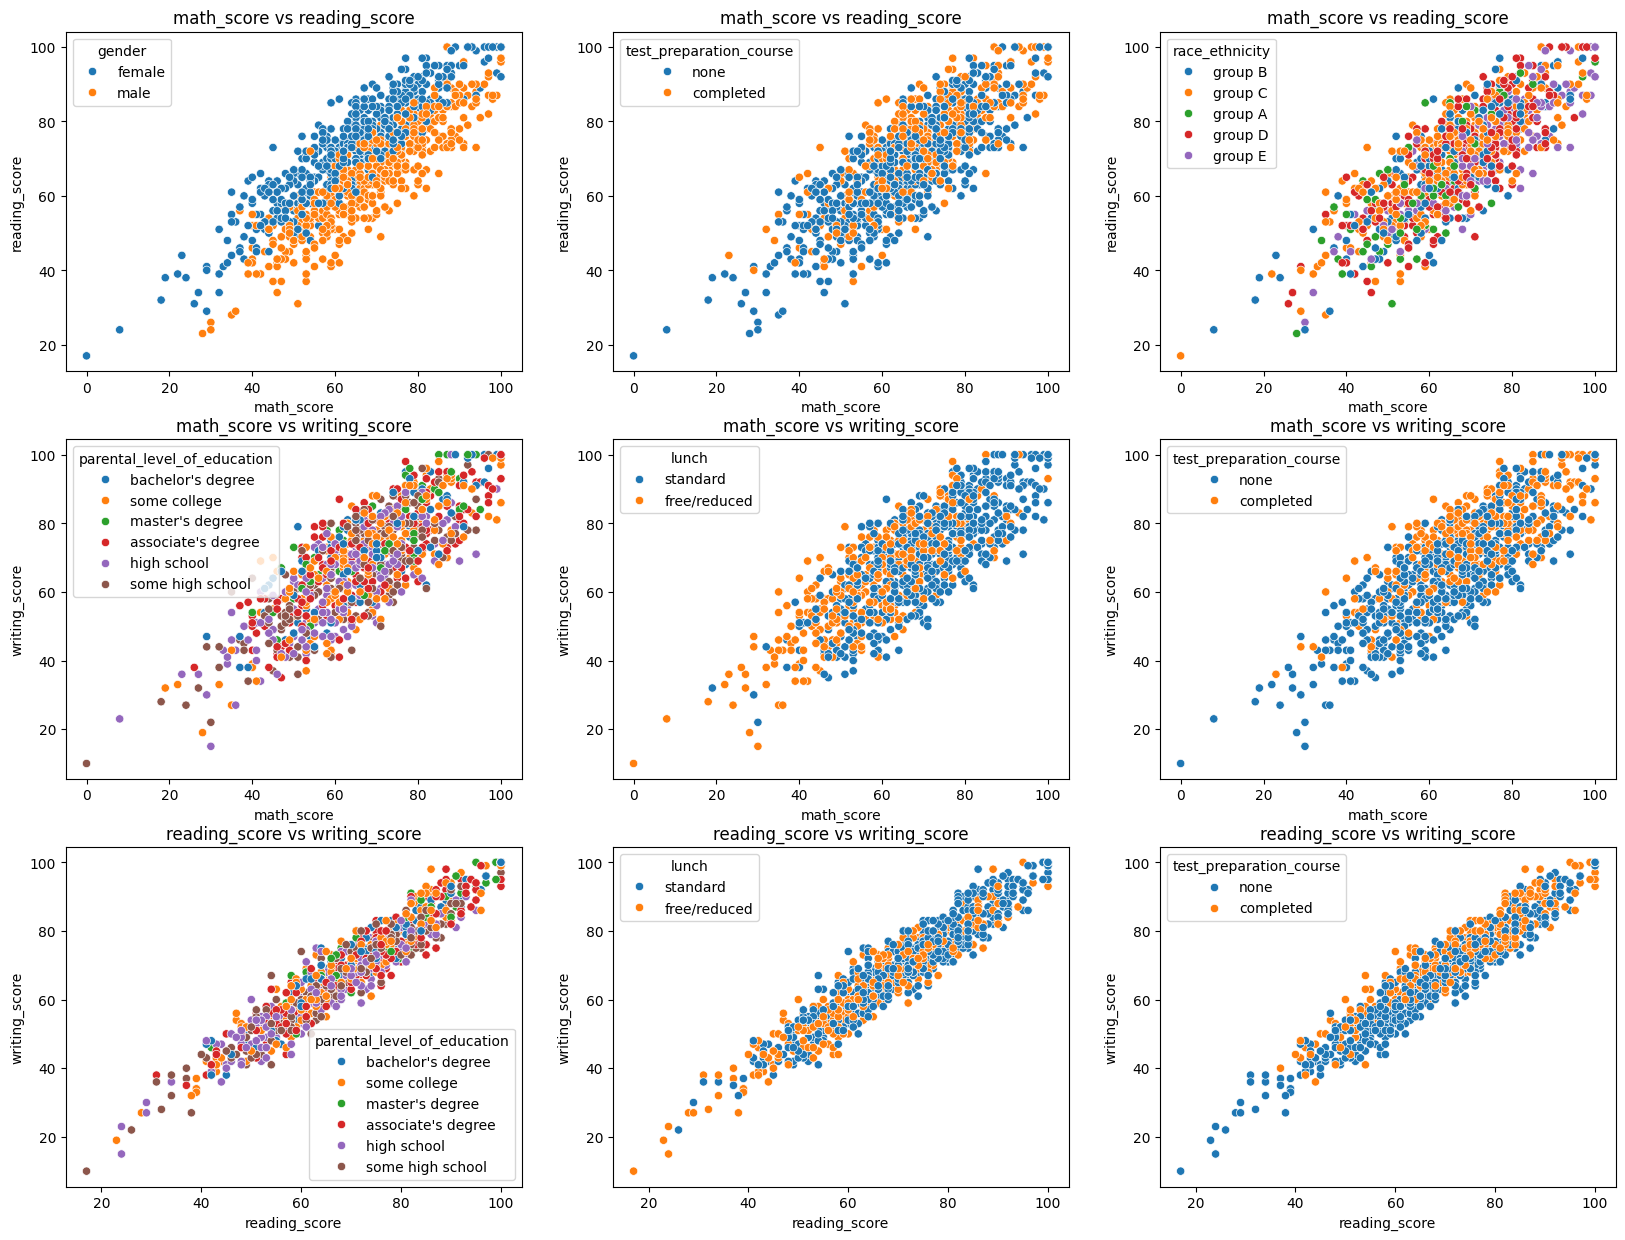

In [45]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15))

sns.scatterplot(x="math_score",y="reading_score",data=df,hue="gender",ax=axes[0][0])
axes[0][0].set_title("math_score vs reading_score")
axes[0][0].set_ylabel("reading_score")
axes[0][0].set_xlabel("math_score")
sns.scatterplot(x="math_score",y="reading_score",data=df,hue="test_preparation_course",ax=axes[0][1])
axes[0][1].set_title("math_score vs reading_score")
axes[0][1].set_ylabel("reading_score")
axes[0][1].set_xlabel("math_score")
sns.scatterplot(x="math_score",y="reading_score",data=df,hue="race_ethnicity",ax=axes[0][2])
axes[0][2].set_title("math_score vs reading_score")
axes[0][2].set_ylabel("reading_score")
axes[0][2].set_xlabel("math_score")
sns.scatterplot(x="math_score",y="writing_score",data=df,hue="parental_level_of_education",ax=axes[1][0])
axes[1][0].set_title("math_score vs writing_score")
axes[1][0].set_ylabel("writing_score")
axes[1][0].set_xlabel("math_score")
sns.scatterplot(x="math_score",y="writing_score",data=df,hue="lunch",ax=axes[1][1])
axes[1][1].set_title("math_score vs writing_score")
axes[1][1].set_ylabel("writing_score")
axes[1][1].set_xlabel("math_score")
sns.scatterplot(x="math_score",y="writing_score",data=df,hue="test_preparation_course",ax=axes[1][2])
axes[1][2].set_title("math_score vs writing_score")
axes[1][2].set_ylabel("writing_score")
axes[1][2].set_xlabel("math_score")
sns.scatterplot(x="reading_score",y="writing_score",data=df,hue="parental_level_of_education",ax=axes[2][0])
axes[2][0].set_title("reading_score vs writing_score")
axes[2][0].set_ylabel("writing_score")
axes[2][0].set_xlabel("reading_score")
sns.scatterplot(x="reading_score",y="writing_score",data=df,hue="lunch",ax=axes[2][1])
axes[2][1].set_title("reading_score vs writing_score")
axes[2][1].set_ylabel("writing_score")
axes[2][1].set_xlabel("reading_score")
sns.scatterplot(x="reading_score",y="writing_score",data=df,hue="test_preparation_course",ax=axes[2][2])
axes[2][2].set_title("reading_score vs writing_score")
axes[2][2].set_ylabel("writing_score")
axes[2][2].set_xlabel("reading_score")

plt.show()

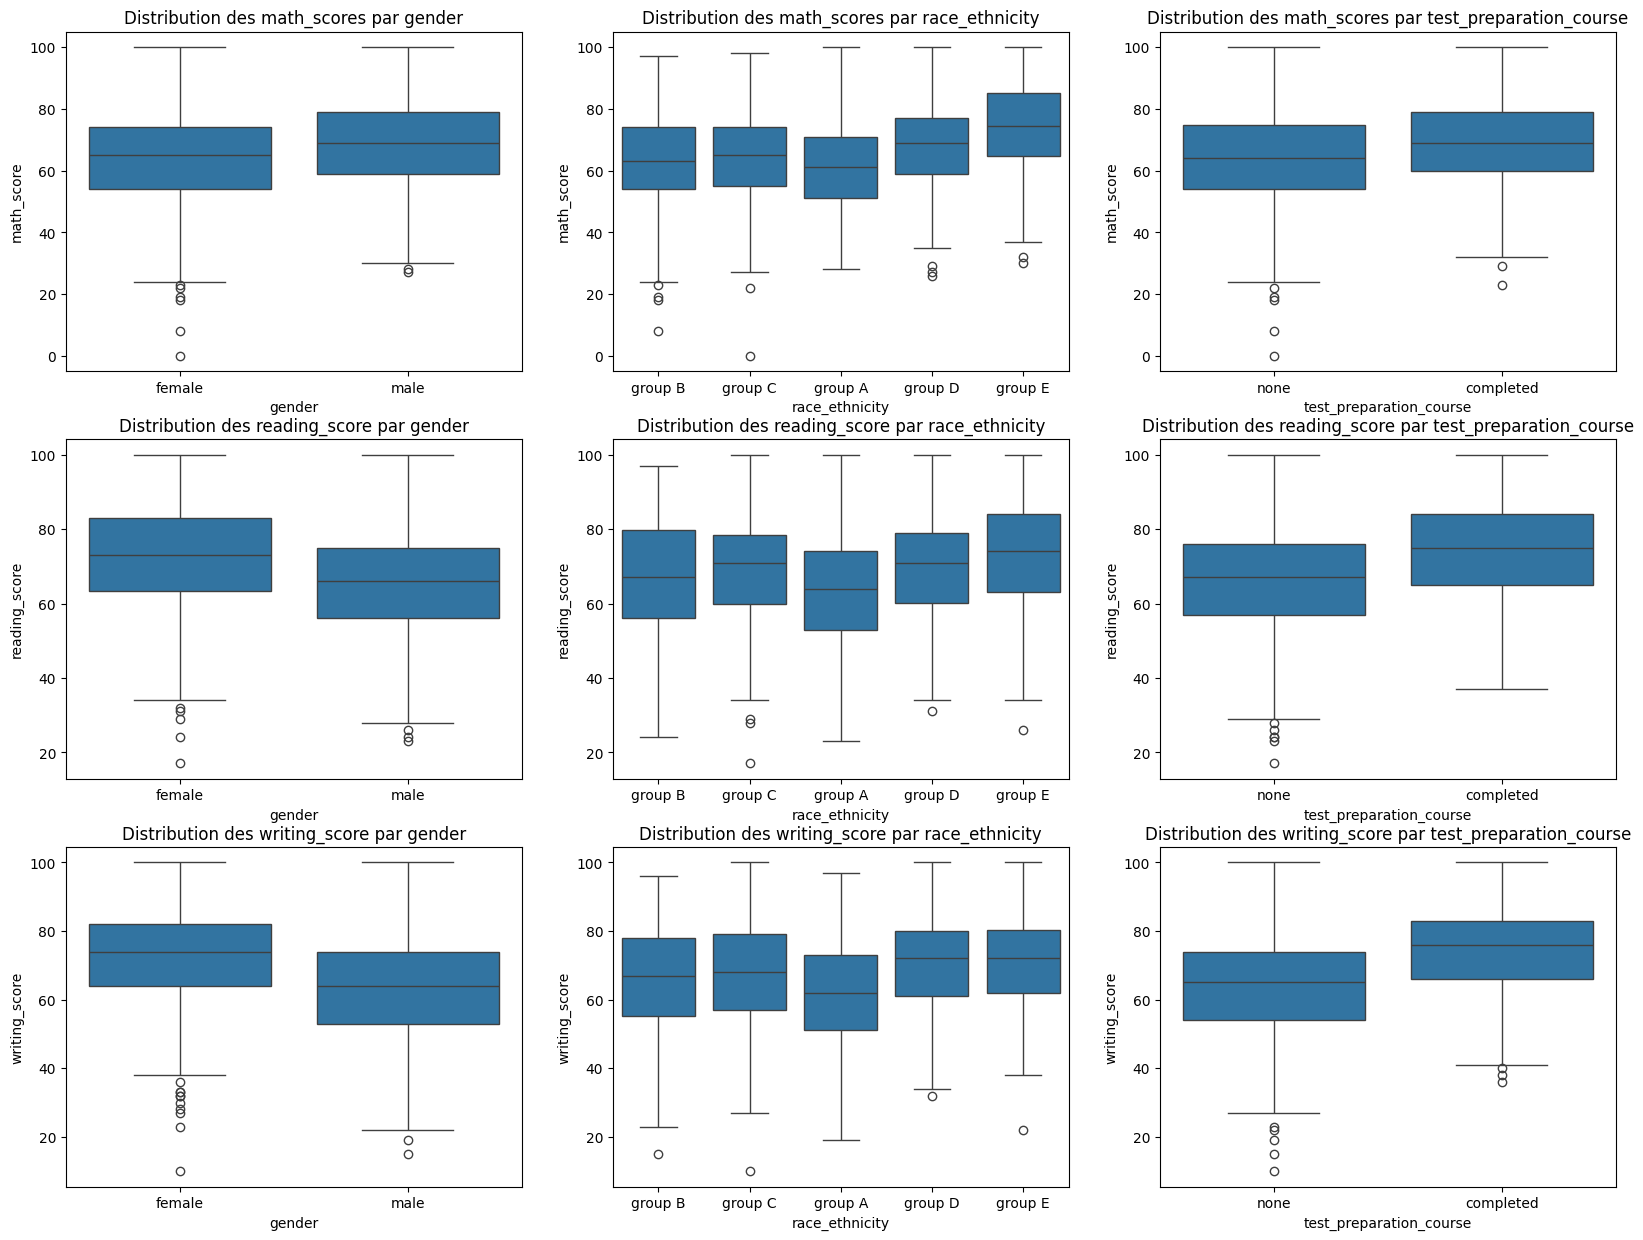

In [98]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15))



sns.boxplot(x="gender", y="math_score", data=df, ax=axes[0][0])
axes[0][0].set_title("Distribution des math_scores par gender")
sns.boxplot(x="race_ethnicity", y="math_score", data=df, ax=axes[0][1])
axes[0][1].set_title("Distribution des math_scores par race_ethnicity")
sns.boxplot(x="test_preparation_course", y="math_score", data=df, ax=axes[0][2])
axes[0][2].set_title("Distribution des math_scores par test_preparation_course")



sns.boxplot(x="gender", y="reading_score", data=df, ax=axes[1][0])
axes[1][0].set_title("Distribution des reading_score par gender")
sns.boxplot(x="race_ethnicity", y="reading_score", data=df, ax=axes[1][1])
axes[1][1].set_title("Distribution des reading_score par race_ethnicity")
sns.boxplot(x="test_preparation_course", y="reading_score", data=df, ax=axes[1][2])
axes[1][2].set_title("Distribution des reading_score par test_preparation_course")

sns.boxplot(x="gender", y="writing_score", data=df, ax=axes[2][0])
axes[2][0].set_title("Distribution des writing_score par gender")
sns.boxplot(x="race_ethnicity", y="writing_score", data=df, ax=axes[2][1])
axes[2][1].set_title("Distribution des writing_score par race_ethnicity")
sns.boxplot(x="test_preparation_course", y="writing_score", data=df, ax=axes[2][2])
axes[2][2].set_title("Distribution des writing_score par test_preparation_course")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed

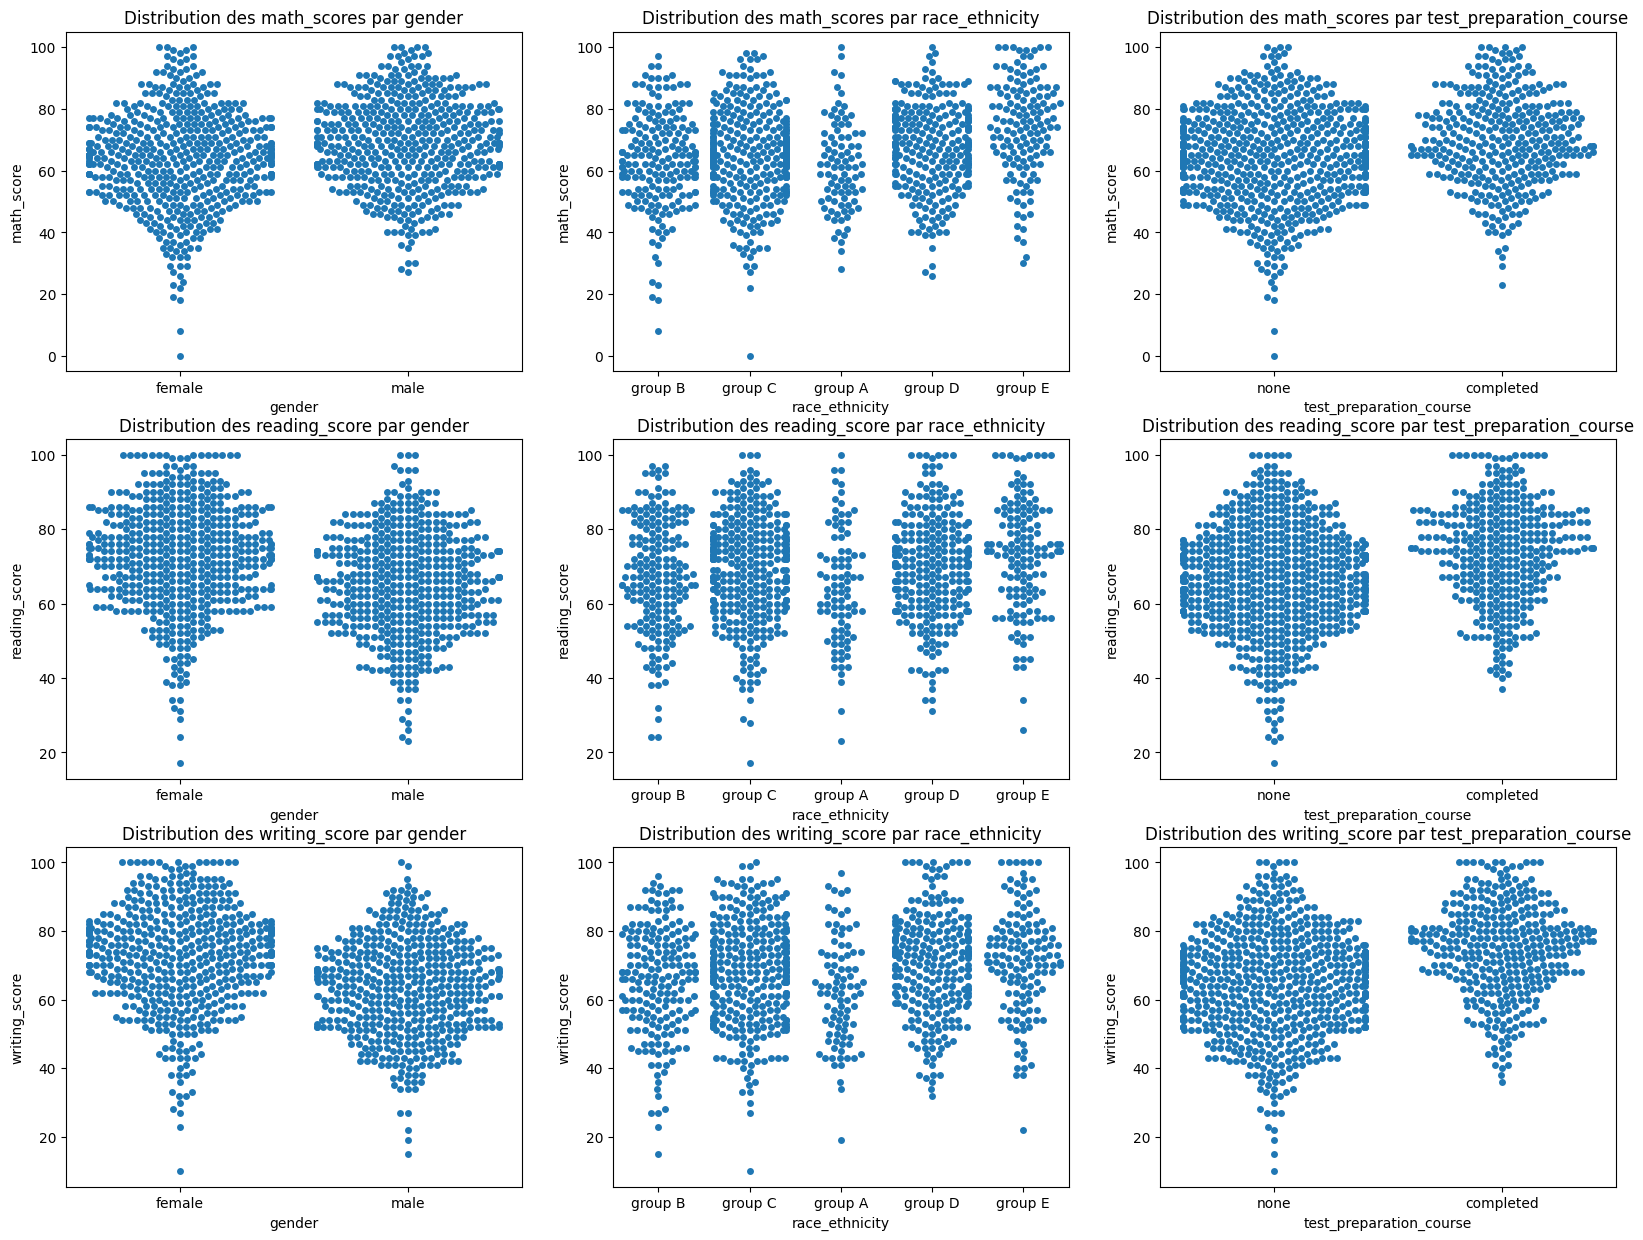

In [106]:


fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15))



sns.swarmplot(x="gender", y="math_score", data=df, ax=axes[0][0])

axes[0][0].set_title("Distribution des math_scores par gender")
sns.swarmplot(x="race_ethnicity", y="math_score", data=df, ax=axes[0][1])
axes[0][1].set_title("Distribution des math_scores par race_ethnicity")
sns.swarmplot(x="test_preparation_course", y="math_score", data=df, ax=axes[0][2])
axes[0][2].set_title("Distribution des math_scores par test_preparation_course")



sns.swarmplot(x="gender", y="reading_score", data=df, ax=axes[1][0])
axes[1][0].set_title("Distribution des reading_score par gender")
sns.swarmplot(x="race_ethnicity", y="reading_score", data=df, ax=axes[1][1])
axes[1][1].set_title("Distribution des reading_score par race_ethnicity")
sns.swarmplot(x="test_preparation_course", y="reading_score", data=df, ax=axes[1][2])
axes[1][2].set_title("Distribution des reading_score par test_preparation_course")

sns.swarmplot(x="gender", y="writing_score", data=df, ax=axes[2][0])
axes[2][0].set_title("Distribution des writing_score par gender")
sns.swarmplot(x="race_ethnicity", y="writing_score", data=df, ax=axes[2][1])
axes[2][1].set_title("Distribution des writing_score par race_ethnicity")
sns.swarmplot(x="test_preparation_course", y="writing_score", data=df, ax=axes[2][2])
axes[2][2].set_title("Distribution des writing_score par test_preparation_course")
plt.show()


In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')